In [27]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.style.use('ggplot')

import pandas as pd 
import numpy as np 

from tqdm import tqdm

from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

from ipywidgets import interactive

from collections import defaultdict

import hdbscan
import folium
import re

cols = ['#e6194b','#3cb44b','#ffe119','#4363d8','#f58231','#911eb4',
		'#46f0f0','#f032e6','#bcf60c','#fabebe','#008080','#e6beff',
		'#9a6324','#fffacb','#800000','#aaffc3','#808000','#ffdBd1',
		'#000075','#808080']*10

choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday', 'Monday', 'Tuesday', 'Wednesday' ]
np.version

<module 'numpy.version' from '/home/ankit/anaconda3/lib/python3.7/site-packages/numpy/version.py'>

In [28]:
df = pd.read_excel("Book.ods", engine="odf")

In [29]:
df

,LON,LAT,Landmark
0,72.580887,23.060772,Sabarmati Ashram
1,72.493621,23.079987,Gujarat Science City
2,72.685513,23.023454,Auto World Vintage Car Museum
3,72.559487,23.022815,Rasala Nature Park
4,72.580755,23.016129,Gaekwad Haveli
5,72.584421,23.024339,Teen Darwaza
6,72.576024,23.027336,Riverfront ellis Bridge
7,72.587673,23.039409,Advani Market
8,72.590012,23.045013,BAPS Shri Swaminarayan Mandir
9,72.587058,23.051132,Mahakali Temple Dudheshvar


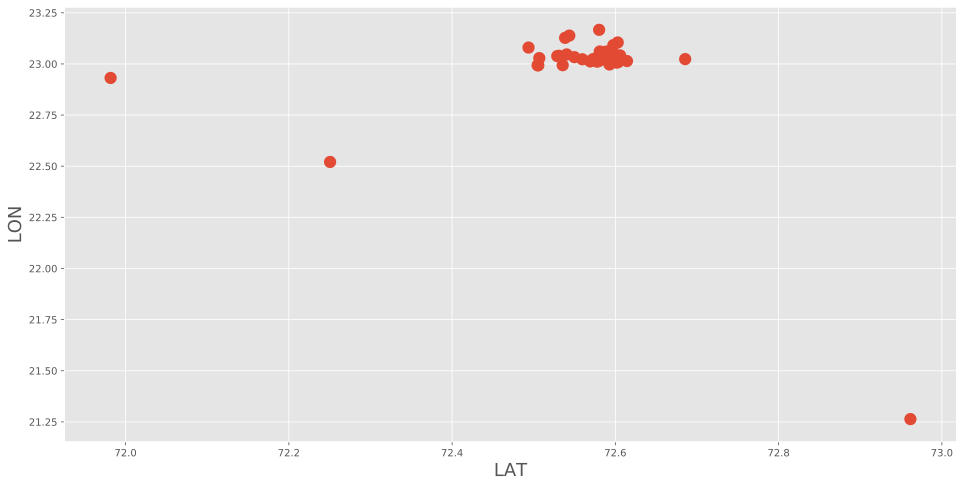

In [30]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df['LON'], df['LAT'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.xlabel('LAT', fontsize=18)
plt.ylabel('LON', fontsize=18)
plt.grid(True)
plt.show()

In [31]:
df.duplicated(subset=['LON','LAT']).values.any()
# df.isna().values.any()

True

In [32]:
df.isna().values.any()

False

In [33]:
df.drop_duplicates(subset=['LON','LAT'],keep='first',inplace=True)

In [34]:
df.shape

(47, 3)

<h2>KMeans_Clustering</h2>

In [36]:
X = np.array(df[['LON','LAT']],dtype='float64')
model = KMeans(n_clusters=10).fit(X)
predictions = model.predict(X)

In [39]:
clustered = pd.concat([df.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [40]:
clustered.drop('index', axis=1, inplace=True)


In [41]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9 ]
choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday', 'Monday', 'Tuesday', 'Wednesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')

In [42]:
clustered.sort_values(by=['Cluster'])

,LON,LAT,Landmark,Cluster,Vacation Day
15,72.590947,23.016813,Astodia Darwaja,0,Monday
27,72.572529,23.022854,Law garden,0,Monday
26,72.614192,23.014120,Jhulta Minar,0,Monday
25,72.580993,23.026985,Sidi Saiyyed Mosque,0,Monday
31,72.603486,23.008731,Kamlanehru Zoo,0,Monday
18,72.601433,23.006449,Kankariya lake,0,Monday
17,72.592786,22.997217,Mira Cinema,0,Monday
16,72.577677,23.010945,Ahmedabad Flower Market,0,Monday
29,72.580788,23.024007,Bhadra Fort,0,Monday
32,72.581901,23.026352,Lal Darwaja,0,Monday


In [45]:
silhouette_score(X,predictions)

0.4645001194285217

In [50]:
def create_map(df,cluster_column):
    m = folium.Map(location=[df.LAT.mean(),df.LON.mean()],zoom_start=9,tiles='Stamen Toner')

    for _, row in df.iterrows():
        
        cluster_colour=cols[row[cluster_column]]
#         df['DAY']=choices[row[cluster_column]]
    
        folium.CircleMarker(
            location=[row.LAT,row.LON],
            radius = 5,
            popup = row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_colour=cluster_colour,
        ).add_to(m)
    return m

m=create_map(clustered,'Cluster')
# print(f'k={k}')
print(f'Silhouette_score:{silhouette_score(X,predictions)}')

m.save('kmeans.html')

Silhouette_score:0.4645001194285217


In [51]:
m

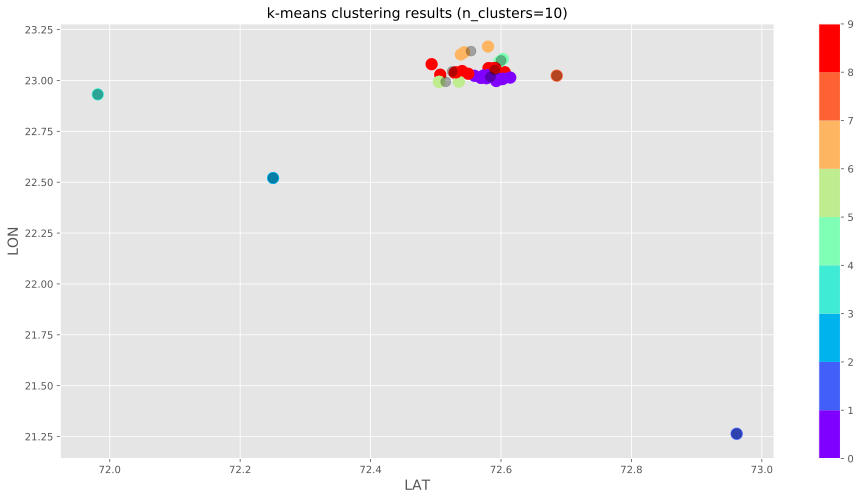

In [54]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['LON'], clustered['LAT'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlabel('LAT', fontsize=14)
plt.ylabel('LON', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid(True)
plt.show()

<h2>HDBSCAN</h2>

In [59]:
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
predictions = clusterer.fit_predict(rads)

In [60]:
silhouette_score(X,predictions)

0.1142794196353634

In [61]:

clustered = pd.concat([df.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8 ]
choices = ['NA/Noise', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
           'Friday','Saturday', 'Sunday', 'Monday', 'Tuesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')
clustered.sort_values(by=['Cluster'])

,LON,LAT,Landmark,Cluster,Vacation Day
13,72.594411,23.044717,Manav Dharma Ashram,-1,NA/Noise
45,71.981626,22.931429,Vadla,-1,NA/Noise
2,72.685513,23.023454,Auto World Vintage Car Museum,-1,NA/Noise
22,72.580110,23.166668,The Adalaj Stepwell,-1,NA/Noise
43,72.535474,22.993856,Vechaar Museum,-1,NA/Noise
17,72.592786,22.997217,Mira Cinema,-1,NA/Noise
38,72.250526,22.520692,Lothal,-1,NA/Noise
37,72.961449,21.263663,Dada Bhagwan Mandir,-1,NA/Noise
14,72.605727,23.040655,Bai Harir Vav,-1,NA/Noise
26,72.614192,23.014120,Jhulta Minar,-1,NA/Noise


In [62]:
m = create_map(clustered,'Cluster') 

In [63]:
m

In [64]:
print(f'No. of Outliers: {len(predictions[predictions==-1])}')

No. of Outliers: 11


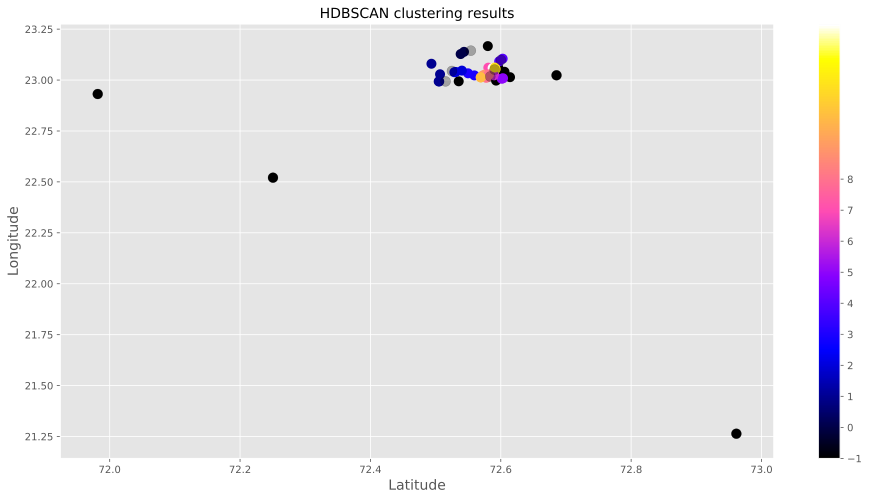

In [68]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['LON'], clustered['LAT'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8])
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid(True)
plt.show()